<a href="https://colab.research.google.com/github/hunnurjirao/Machine Learning with TensorFlow/blob/master/Linear_Regression(Part-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Matrix Inverse Method**

### Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.executing_eagerly()

sess = tf.Session() # create the session

Instructions for updating:
non-resource variables are not supported in the long term


### Preparing the data

In [2]:
x_vals=[]
y_vals=[]
for i in range(1,101):
  x_vals.append(i)
  y_vals.append(2*i +1)

x_vals = np.array(x_vals)
y_vals =x_vals + np.random.normal(0,10,100)
print(x_vals.shape, y_vals.shape)

(100,) (100,)


In [3]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

### Converting into tensors

In [4]:
A_tensor = tf.constant(A,dtype = tf.float32)
b_tensor = tf.constant(b, dtype = tf.float32)

### Solving via Matrix Inverse Method

In [5]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)

tA_A_inv = tf.matrix_inverse(tA_A)

product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))

solution = tf.matmul(product, b_tensor)

solution_eval = sess.run(solution)

In [6]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 1.0104742
y_intercept: -1.0155448


### Plotting the best fit line

In [7]:
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

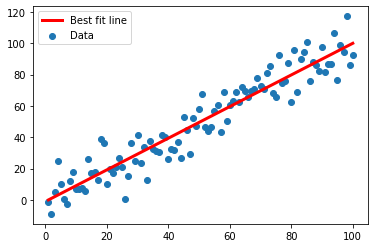

In [8]:
plt.scatter(x_vals, y_vals, label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.show()

# **Implementing a Decomposition Method**

### We have already imported the necessary modules and prepared the data above

In [9]:
# x_vals=[]
# y_vals=[]
# for i in range(1,101):
#   x_vals.append(i)
#   y_vals.append(2*i +1)

# x_vals = np.array(x_vals)
# y_vals =x_vals + np.random.normal(0,10,100)
# print(x_vals.shape, y_vals.shape)

In [10]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [11]:
A_tensor = tf.constant(A,dtype = tf.float64)
b_tensor = tf.constant(b, dtype = tf.float64)

In [12]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)

L = tf.cholesky(tA_A)

tA_b = tf.matmul(tf.transpose(A_tensor), b)

sol1 = tf.matrix_solve(L, tA_b)

sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [13]:
solution_eval = sess.run(sol2)

slope = solution_eval[0][0]

y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 1.0104739375750604
y_intercept: -1.015555288249142


In [14]:
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

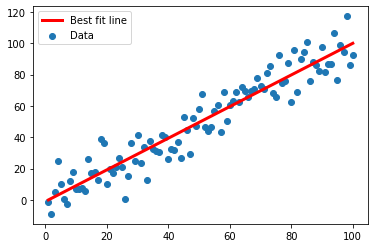

In [15]:
plt.scatter(x_vals, y_vals, label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

# **Learning the TensorFlow way of Linear Regression**

### Import the necessary modules

In [16]:
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()               # here we are reseting the graph
sess = tf.Session()

iris = datasets.load_iris()

### Load the data

In [17]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

### Create variables and placeholders

In [18]:
learning_rate = 0.05
batch_size = 25

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [19]:
model_output = tf.add(tf.matmul(x_data, A), b)

### Loss(L2) and optimizer

In [20]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [21]:
init = tf.global_variables_initializer()
sess.run(init)

### Training loop

In [22]:
loss_vec = []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size=batch_size)

  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  
  sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})

  temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  
  loss_vec.append(temp_loss)
  
  if (i+1)%25 == 0:
    print('Step:  '+ str(i+1) + ' A = ' + str(sess.run(A)[0][0]) + '  b = ' + str(sess.run(b)[0][0]) + '  Loss:  ' + str(temp_loss))

Step:  25 A = 2.0691006  b = 2.9827874  Loss:  1.7700093
Step:  50 A = 1.6104296  b = 3.7358735  Loss:  0.63368136
Step:  75 A = 1.2490538  b = 4.1448092  Loss:  0.44908035
Step:  100 A = 1.1812904  b = 4.4141297  Loss:  0.18682148


### Plotting the best fit line

In [23]:
slope = sess.run(A)[0]
y_intercept = sess.run(b)[0]
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

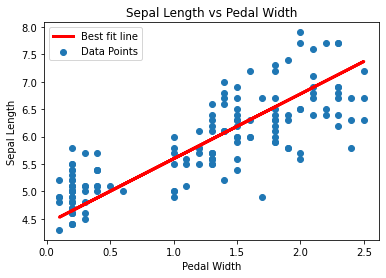

In [24]:
plt.scatter(x_vals, y_vals, label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)

plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

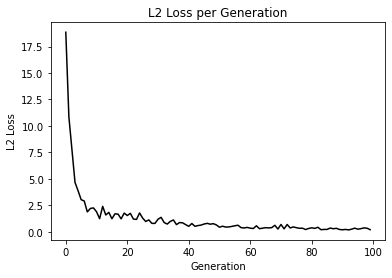

In [25]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

# **Understanding Loss Functions in Linear Regression**

In [26]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [27]:
batch_size = 25
learning_rate = 0.03 

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [28]:
#L1 loss

loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

#L2 loss

loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

In [29]:
init = tf.global_variables_initializer()
sess.run(init)

In [30]:
loss_vec_l1 = []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size=batch_size)

  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])

  sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
  
  temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
  
  loss_vec_l1.append(temp_loss_l1)
  if (i+1)%25==0:
    print('Step: ' + str(i+1) + ' A = ' + str(sess.run(A)[0][0]) + ' b = ' + str(sess.run(b)[0][0]) + '  loss: ' + str(temp_loss_l1) )

Step: 25 A = 3.0215688 b = 0.69855464  loss: 1.9559846
Step: 50 A = 3.0906894 b = 1.0525547  loss: 1.8859426
Step: 75 A = 3.0560095 b = 1.3417548  loss: 1.649975
Step: 100 A = 2.98677 b = 1.6141552  loss: 1.5936447


In [31]:
loss_vec_l2 = []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size=batch_size)

  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])

  sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
  
  temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
  
  loss_vec_l2.append(temp_loss_l2)
  if (i+1)%25==0:
    print('Step: ' + str(i+1) + ' A = ' + str(sess.run(A)[0][0]) + ' b = ' + str(sess.run(b)[0][0]) + '  loss: ' + str(temp_loss_l2) )

Step: 25 A = 2.4127162 b = 2.4636996  loss: 1.3868998
Step: 50 A = 1.9941363 b = 3.0794277  loss: 0.857091
Step: 75 A = 1.6840262 b = 3.5299466  loss: 0.8198187
Step: 100 A = 1.4850909 b = 3.8790114  loss: 0.42726898


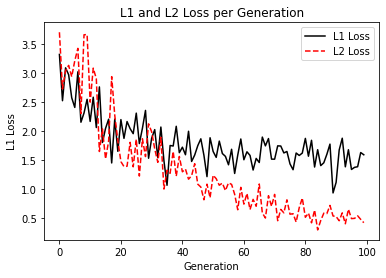

In [32]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')

plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

# **Implementing Deming regression**

In [33]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.03
batch_size = 50

In [34]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [35]:
demming_numerator = tf.abs(tf.math.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))

demming_denominator = tf.sqrt(tf.add(tf.square(A),1))

loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [36]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)

train_step = my_opt.minimize(loss)

In [37]:
init = tf.global_variables_initializer()
sess.run(init)

In [38]:
loss_vec = []
for i in range(250):
  rand_index = np.random.choice(len(x_vals), size=batch_size)

  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

  temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})

  loss_vec.append(temp_loss)
  
  if (i+1)%50==0:
    print('Step:  ' + str(i+1) + ' A = ' + str(sess.run(A)[0][0]) + ' b = ' + str(sess.run(b)[0][0]) + '  Loss: ' + str(temp_loss))


Step:  50 A = 2.3930194 b = 1.810132  Loss: 0.58095145
Step:  100 A = 2.6751254 b = 2.055131  Loss: 0.43233842
Step:  150 A = 2.7497306 b = 2.1741545  Loss: 0.44993696
Step:  200 A = 2.7314808 b = 2.2325501  Loss: 0.39344802
Step:  250 A = 2.7046328 b = 2.2853622  Loss: 0.5223671


In [39]:
slope = sess.run(A)[0]
y_intercept = sess.run(b)[0]
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

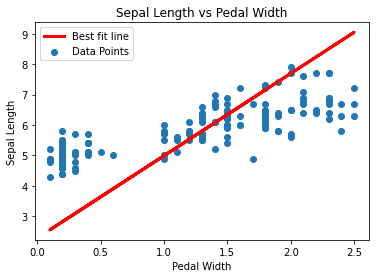

In [40]:
plt.scatter(x_vals, y_vals, label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()